In [2]:
pip install optuna xgboost scikit-learn pandas matplotlib seaborn

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 1.9 MB/s eta 0:01:18
   ---------------------------------------- 1.0/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 2.1/150.0 MB 2.6 MB/s eta 0:00:57
    --------------------------------------- 2.9/150.0 MB 3.3 MB/s eta 0:00:46
   - -------------------------------------- 4.2/150.0 MB 3.7 MB/s eta 0:00:40
   - -------------------------------------- 5.0/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 6.0/150.0 MB 3.8 MB/s eta 0:00:38
   - -------------------------------------- 7.1/150.0 MB 3.9 MB/s eta 0:00:37
   -- ------------------------------------- 7.9/150.0 MB 3.9 MB/s eta 0:00:37
   -- ------------------------------------- 8.9/150.0 MB 4.0 MB/s eta 0:00:36
   -- -


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded 1315 total rows from 76 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               309  0.006466  0.007450  0.030751  0.000215   
1               370  0.005400  0.005342  0.019057  0.000215   
2               340  0.005876  0.007105  0.035768  0.000215   
3               320  0.006244  0.006556  0.025829  0.000683   
4               400  0.004995  0.005944  0.025841  0.000164   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  17                   20             0  
1                  19                   20             0  
2                  19                   20             0  
3                  17                   20             0  
4                  21                   20             0  

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       214
           1       0.99      0.96      0.98       181

    accuracy                           0.

c:\Users\Chirag\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


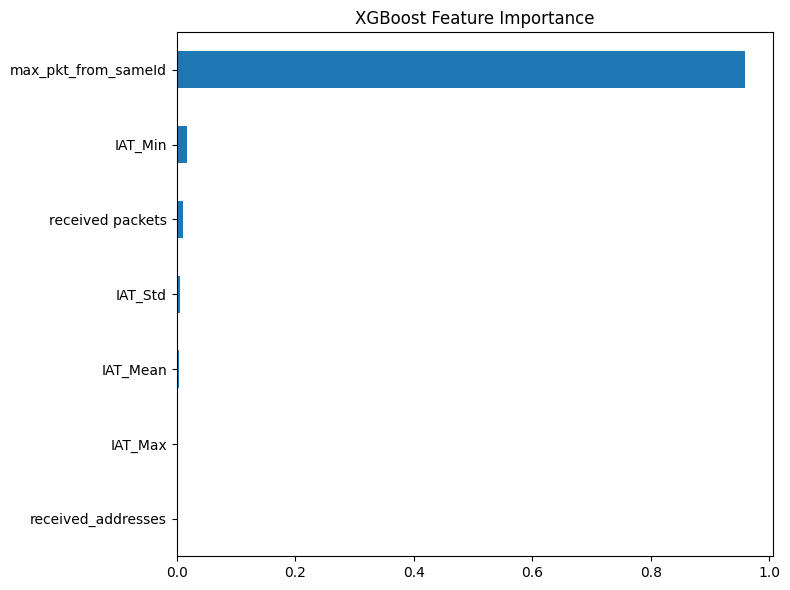

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import glob

# # === Load the dataset ===
# file_path = 'Dataset_timewin_28.json'

# with open(file_path, 'r') as f:
#     data = [json.loads(line) for line in f]

# df = pd.DataFrame(data)


file_list = glob.glob("Dataset_timewin_*.json")


# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())



# === Prepare Features and Labels ===
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Train XGBoost Model ===
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Feature Importance Plot ===
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()
